In [2]:
import numpy as np
import matplotlib.pyplot as plt

The codes below calculates the beam radius according to the D4Sigma definition following ISO 11146-1 section 9. The intensity of the image imported was read as a matrix of grey values. The total intensity is calculated as a sum of the grey values of the image. Beam centroid and the beam radius were then calculated


In [53]:
I = plt.imread('24-1.tif')
height, width = I.shape # rows, columns

scale = 0.10350 # um/pixel

#Create x and y coordinates of the image
x = np.arange(0,width * scale,scale)
#print(x.shape)
y = np.arange(0,height* scale,scale)
X, Y = np.meshgrid(x,y)

# Total intensity over the area
N = I.sum()

# Centroid
x_bar = np.multiply(X,I).sum()/N #elementwise multiplication
y_bar = np.multiply(Y,I).sum()/N

# D4sig 
dis_x = X - x_bar * np.ones([height,width])
dis_sqr_x = np.multiply(dis_x,dis_x)

var = np.multiply(dis_sqr_x, I).sum()/N
wx = np.sqrt(4 * var)

dis_y = Y - y_bar * np.ones([height,width])
dis_sqr_y = np.multiply(dis_y,dis_y)

var = np.multiply(dis_sqr_y, I).sum()/N
wy = np.sqrt(4 * var)

print('Beam radius in x direction',wx)

print('Beam radius in y direction',wy)

13.02576653656877 13.776264195889317
13.484549380466666 13.595851935726367


The cells below creates a synthetic Gaussian beam and calculate the beam radius in the same way as a test.

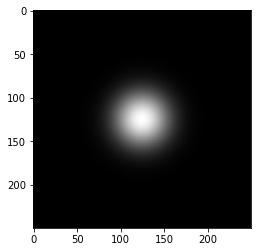

<Figure size 432x288 with 0 Axes>

In [40]:
x = np.linspace(-5, 5, 250)
y = np.linspace(-5, 5, 250)

xx, yy = np.meshgrid(x, y)

w = 3
zz = 500*np.exp(-2*(xx**2 + yy**2)/w)

plt.imshow(zz,cmap='gray')
plt.show()

plt.savefig('gaussianbeam.png')

In [43]:
height = len(y)
width = len(x)
print(height,width)
# Total intensity over the area
N = zz.sum()

# Centroid
x_bar = np.multiply(xx,zz).sum()/N #elementwise multiplication
y_bar = np.multiply(yy,zz).sum()/N
print(x_bar,y_bar)

# D4sig 
dis_x = xx - x_bar * np.ones([height,width])
dis_sqr_x = np.multiply(dis_x,dis_x)

var = np.multiply(dis_sqr_x, zz).sum()/N
wx = np.sqrt(4 * var)

dis_y = yy - y_bar * np.ones([height,width])
dis_sqr_y = np.multiply(dis_y,dis_y)

var = np.multiply(dis_sqr_y, zz).sum()/N
wy = np.sqrt(4 * var)

print(wx,wy)

250 250
-4.073053574160451e-18 1.6561417122458753e-18
1.7320506057491336 1.7320506057491334
